# Unbiased COVID19 analysis


1. approach create plotly chart
2. modify it with dash components
3. finally integrate in a single application


# Notes Sofie


Veel mensen denken dat het voorbij is. Dat het niet erg was: griepje, bangmakerij, conspiracy theory.
Dat de maatregelen overbodig waren. Denkfout cf. Boudry, en gevaarlijk: wat als er een tweede golf komt. Dan ben je best goed voorbereid, genoeg geïnformeerd over virus, mogelijke strategieën, lessen getrokken uit eerste fase.
Want: hoewel denkfout, kritisch evalueren is wel belangrijk.
Dat kan door data te analyseren.

Eerst en vooral: 
Vgl. griepgolf 2018 => gaat niet op

Dan: leeftijd
Alleen mensen die niet lang meer te leven hadden?

Vooral woonzorgcentra?
Aanpak: geen lockdown in centra, grote groep samen
Vooral immuniteit bij ouderen?

Volgende golf: oudere groep van jongere groep scheiden?
Aantal bedden voor jongere op IC?
Berekening: aantal bedden voor jongere mensen op IC zonder lockdown

Vgl. andere landen:
Moment lockdown 
Aanpak woonzorgcentra?
Versoepeling en effecten

Datageletterdheid van groot belang
Er circuleren veel cijfers. Op zoek naar houvast proberen te vergelijken, bv. met griep, andere landen. Maar kritisch zijn over betrouwbaarheid, en data

# Story map: Lockdown enkel voor WZC nodig?

1. Start from unbiased information = mortality figures => wat is nu een corona dode? De rapportering hierrond is niet betrouwbaar
    - Fig 1: mortality per year
        - add play button: to play over the year 
        - show median mortality first and keep in visual, thickness CI also?
        - annotate events such as the flu in 2018 => this explain 2020 and 2018 are interesting
         
    - Fig 2: Excess mortality  is interesting to look at: compare 2018 and 2020 for excess mortality AND cumulative excess mortality (als compare with average)
        - area chart such that the different age groups are visible!
        - add check boxes to remove age groups => possible to 
        
    - Fig 3: Excess mortality 2018 vs 2020 on a map: + add number killed extra + aggregate per continent
    
    - Fig XYZ: hoeveel ziekenhuisbedden ingenomen per leeftijd. Stel selectieve lockdown wat gebeurt er dan bij ICU?
   
    
2. Countries cannot be compared!?
    - Fig 4: excess mortality comparison of 12 countries from mortality.org
        - add check boxes to remove age groups
        

3. An inbiased estimator: IFR: what do we learn?
    - Fig 5: plot IFR (now assume constant maar wsch heeft Maarten de meeste berekend)
        - gewone bar plot, veel interacties lijken mij niet nodig 
        - misschien bibliograpfische vermelding in een infobox
        - tijdstip: zoveel % immuniteit gemeten
        - eventueel een boodschap laten oplichten in infobox wat is IFR?
    - Fig 6: using IFR calculate actual Infected compared with what is reported => combine two datasets
        - can we conclude anything? It is meaningful to look at the other data?
        - is er een onderscheid per leeftijd? (er zullen bijvoorbeeld veel meer kinderen immuun worden
    - Fig 7: IFR to immunity curves maken
        - ook hier per leeftijd!

4. Countries cannot be compared!? Bis
    - Fig 8: Find the most similar countries in terms of GDP, size, diabetes,...
        - hover: show parameters per land, startdatum, 
    - Fig 9: R0 per country, link to Volkskrant data
        - indicate when measures where taken
        - KUnnen we hier ook ICU cijfers tonen

5. Two pandemics? R0 en multiplication graph for +65 vs -65
    - FigXYZ: wat is het effect van een R0 van 0.8 vs 0.9 => nog een conspiracy is dat voor de lockdown de R0 al iets kleiner was dan 1. Maar een platkloppen van die R0 heeft een gigantische impact  op hoe snel virus uitdooft => aantal besmettingen en bijhorende sterftecijfers. Hadden we dus niks gedaan en R0 blijft op < kies waarde > dan waren er nog Y doden gevallen
    - WAarom beweren mensen dat het virus voor de lockdown de R0 al onder de 1 was gezakt. Komt dit niet gewoon
    - door een saturatie van de testen, of een vertraagd beschikbaar worden van de juiste cijfers

## Fig 1: mortality per year

####  Effects:

- add play button: to play over the year
- show median mortality first and keep in visual, thickness CI also?
- annotate events such as the flu in 2018 => this explain 2020 and 2018 are interesting

### 1a. matplotlib

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import time

### data: mortality.org

In [2]:
path = Path('../data/mortality_org.csv')
df = pd.read_csv(path, skiprows=1)
df.head(n=3)

CountryCode  Year  Week Sex      D0_14      D15_64      D65_74      D75_84  \
0         AUT  2000     1   m   6.278031  183.721969  211.012454  237.479012   
1         AUT  2000     1   f   5.351826  100.648174  141.073418  335.405547   
2         AUT  2000     1   b  11.495527  284.504473  355.118170  573.307662   

         D85p  DTotal     R0_14    R15_64    R65_74    R75_84      R85p  \
0  175.508535   814.0  0.000467  0.003527  0.037432  0.090736  0.249625   
1  470.521035  1053.0  0.000418  0.001938  0.019563  0.060971  0.225566   
2  642.574168  1867.0  0.000438  0.002735  0.027639  0.070619  0.230392   

     RTotal  Split  SplitSex  Forecast  
0  0.010925      1         0         0  
1  0.013238      1         0         0  
2  0.012120      1         0         0

### constants and methods

In [3]:
age_groups = ['D0_14', 'D15_64', 'D65_74', 'D75_84', 'D85p', 'DTotal']

main_message ="Covid19 is not just the Flu! 10x more deadly even WITH lockdown!"
y_title = "New deaths per week"
x_title = "Week Number"

def transform_week_to_date(year, week):
    #transform this to a a string (a monday)
    iso_string = '{} {} 1'.format(year, week)
    
    #parse this to time library
    parse_iso = time.strptime(iso_string, '%Y %W %w')
    
    
    return "-".join([str(parse_iso.tm_year), 
                     str(parse_iso.tm_mon), 
                     str(parse_iso.tm_mday)])


def calc_median_mortality(df, country, age_group):
    
    mask_gender_all = df['Sex'] == 'b'
    mask_country = df['CountryCode'] == country
    
    df_country = pd.DataFrame(df[mask_country & mask_gender_all])
    
    df_median = (
        df_country.groupby('Week')
            .agg({
                age_group: np.median
            })
    )
    

    
    
    
    return df_median.rename(columns={age_group: age_group+"_median"})
    
    

def calc_extremes_mortality(df, country , age_group, n_extremes_tb_removed):
    
    mask_gender_all = df['Sex'] == 'b'
    mask_country = df['CountryCode'] == country
    
    df_country = pd.DataFrame(df[mask_country & mask_gender_all])

    week_index = []
    lower_b = []
    upper_b = []
    for gr in df_country.groupby('Week'):

        week_index.append(gr[0])
        gr_df = gr[1]


        sorted_age = gr_df[age_group].sort_values(ascending=True)

        lower_b.append( sorted_age.iloc[n_extremes_tb_removed])
        upper_b.append( sorted_age.iloc[-1-n_extremes_tb_removed])


    s1 = pd.Series(index=week_index, data=lower_b, name=age_group+'_lower').to_frame()
    s2 = pd.Series(index=week_index, data=upper_b, name=age_group+'_upper').to_frame()

    df = pd.concat([s1,s2], axis=1)
    

    
    return df

def calc_mortality_year(df, country, age_group, year):
    
    mask_gender_all = df['Sex'] == 'b'
    mask_country = df['CountryCode'] == country
    
    df_country = pd.DataFrame(df[mask_country & mask_gender_all])
    
    mask_year = df_country['Year'] == year
    
    df_year = pd.DataFrame(df_country[mask_year][[age_group, 'Week']])
    
    
    return df_year.set_index('Week').rename(columns={age_group: age_group+"_"+str(year)})


EVENT_DICT = {
    (2018, 8): "2018 Flu was twice as heavy as usual, ?2148?? people killed",
    (2018, 20): "Probably this is heatwaves we are looking at, which lead to higher mortality",
    (2020,12): "Week 12 was when Belgium went in lockdown"
} #year,week

In [4]:
### TEST
test = False

if test == True:
    print(transform_week_to_date(2020, 4))
    df_test_1 = calc_median_mortality(df, "BEL", "DTotal") #OK
    df_test_2 = calc_extremes_mortality(df, "BEL", "DTotal", 2)
    df_test_3 = calc_mortality_year(df, "BEL", "DTotal", 2020)

    df_test_3;

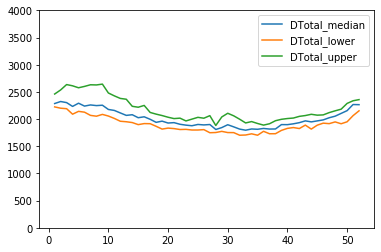

In [5]:
df_m = calc_median_mortality(df, "BEL", "DTotal")
df_m

df_ul = calc_extremes_mortality(df, "BEL", "DTotal", 2)
df_ul

df_stats = pd.concat([df_m, df_ul], axis=1)
df_stats.plot(kind='line', ylim=[0,4000])

In [6]:
year = 2020
df2020 = calc_mortality_year(df, "BEL", "DTotal", year)

df2020['date'] = (
    df2020
        .reset_index()['Week']
        .apply(lambda w : transform_week_to_date(year, w))
        .values #index is different!
)

year = 2018
df2018 = calc_mortality_year(df, "BEL", "DTotal", year)

df2018['date'] = (
    df2018
        .reset_index()['Week']
        .apply(lambda w : transform_week_to_date(year, w))
        .values #index is different!
)



### 1b. plotly

In [7]:
import plotly.graph_objs as go
import plotly.offline as pyo

In [8]:
df_stats.head(n=3)

DTotal_median  DTotal_lower  DTotal_upper
1         2286.0        2224.0        2461.0
2         2323.0        2200.0        2536.0
3         2303.0        2191.0        2635.0

In [9]:
#to create area plot we create the boundary of this area as a line plot

ser_below = df_stats['DTotal_lower']
ser_up = df_stats.sort_index(ascending=False)['DTotal_upper']

ser_twist = pd.concat([ser_below, ser_up])
ser_twist

1    2224.0
2    2200.0
3    2191.0
4    2090.0
5    2142.0
      ...  
5    2576.0
4    2612.0
3    2635.0
2    2536.0
1    2461.0
Length: 104, dtype: float64

In [10]:
df2018.head(n=5)

DTotal_2018       date
Week                        
1          2382.0   2018-1-1
2          2317.0   2018-1-8
3          2336.0  2018-1-15
4          2253.0  2018-1-22
5          2355.0  2018-1-29

In [11]:
max_val = df2020.max().values[0]

In [12]:
trace_conf = go.Scatter(
    x=ser_twist.index,
    y=ser_twist.values,
    fill='tozerox',
    fillcolor='rgba(231,107,243,0.5)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False,
    hoverinfo="none"

)

trace_median = go.Scatter(
    x=df_stats.index,
    y=df_stats['DTotal_median'],
    fillcolor='rgba(0,0,200,0.9)',
    name='median (last 20 years)',
    mode='lines',
    line={
        'width': 5
    },
    hoverinfo="y",
)

trace_2018 = go.Scatter(
    x=df2018.index,
    y=df2018['DTotal_2018'],
    fillcolor='rgba(0,200,0,0.9)',
    name='2018',
    mode='lines',
    line={
        'width': 2,
        'dash': 'dash'
    },
    hoverinfo="text",
    hovertext=df2018['date'] 
)

trace_2020 = go.Scatter(
    x=df2020.index,
    y=df2020['DTotal_2020'],
    fillcolor='rgba(200,0,0,0.9)',
    name='2020',
    mode='lines+markers',
    marker={
       "size": 10 
    },
    hoverinfo="y+text",
    hovertext=df2020['date'] 
)






data = [trace_conf, trace_median, trace_2018, trace_2020]
layout = go.Layout({
    'xaxis': {
        'title_text': 'week',
        'range': [1,50],
        'showspikes': True,
        'spikethickness': 1,
        'spikecolor': 'black'
    },
    'yaxis': {
        'title_text': 'deaths per week',
        'range': [0,max_val+100],
        'showspikes': True,
        'spikethickness': 1,
        'spikecolor': 'black'
    }

})

fig = go.Figure(data=data, layout=layout)

pyo.iplot(fig)

In [13]:
fig.update_layout(
    showlegend=False,
    annotations=[
        dict(
            x=9.5,
            y=3100,
            text="Flu Epidemic 2018",
            showarrow=True,
            arrowhead=5,
            ax=0,
            ay=-110
        ),
        dict(
            x=12,
            y=2500,
            text="Lockdown 2020-3-17",
            showarrow=True,
            arrowhead=5,
            ax=0,
            ay=150
        ),
        dict(
            x=18,
            y=2300,
            text="End Lockdown 2020-5-9",
            showarrow=True,
            arrowhead=5,
            ax=0,
            ay=100
        )
        
    ]
)



### 1c. dash

* add a country selector
* add 3 year selectors
* add a slider / play button
* clean up hover information OK
* annotate lockdown, annotate end of lockdown OK


* Annotations: https://plotly.com/python/text-and-annotations/
* hoverinfo: https://plotly.com/python/reference/#scatter-hoverinfo => zet dit op tekst op coordinaten kwijt te spelen
